# Optimizing ML Regression Models with Applying Kaggle Home Price

<IMG SRC="housesbanner.png">

In [2]:
df<-read.csv("HPP.csv")

In [3]:
head(df)

MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,Condition1,Condition2,...,BuiltYear1,BuiltYear2,BuiltYear3,BuiltYear4,BuiltYear5,BsmtFTM_Flag,GasA_Flag,HasGrg,HasPool,SalePrice
60,4,65,91.92388,1,1,1,1,1,1,...,0,0,0,0,1,0,1,1,0,12.24769
20,4,80,97.97959,1,1,1,4,2,1,...,0,0,1,0,0,0,1,1,0,12.10901
60,4,68,106.06602,1,2,1,1,1,1,...,0,0,0,0,1,0,1,1,0,12.31717
70,4,60,97.72410,1,2,1,2,1,1,...,1,0,0,0,0,0,1,1,0,11.84940
60,4,84,119.41524,1,2,1,4,1,1,...,0,0,0,1,0,0,1,1,0,12.42922
50,4,85,118.80657,1,2,1,1,1,1,...,0,0,0,1,0,0,1,1,0,11.87060


In [4]:
names(df)

[1] "MSSubClass"           "MSZoning"             "LotFrontage"         
  [4] "LotArea"              "Street"               "LotShape"            
  [7] "LandContour"          "LotConfig"            "Condition1"          
 [10] "Condition2"           "BldgType"             "HouseStyle"          
 [13] "OverallQual"          "OverallCond"          "YearBuilt"           
 [16] "YearRemodAdd"         "RoofStyle"            "RoofMatl"            
 [19] "Exterior1st"          "MasVnrType"           "ExterQual"           
 [22] "ExterCond"            "Foundation"           "BsmtQual"            
 [25] "BsmtCond"             "BsmtExposure"         "BsmtFinType1"        
 [28] "BsmtFinSF1"           "BsmtFinSF2"           "BsmtUnfSF"           
 [31] "TotalBsmtSF"          "HeatingQC"            "CentralAir"          
 [34] "Electrical"           "GrLivArea"            "BsmtFullBath"        
 [37] "BsmtHalfBath"         "FullBath"             "HalfBath"            
 [40] "BedroomAbvGr"         "KitchenAbvGr"         "KitchenQual"         
 [43] "TotRmsAbvGrd"         "Functional"           "Fireplaces"          
 [46] "FireplaceQu"          "GarageType"           "GarageFinish"        
 [49] "GarageCars"           "GarageArea"           "GarageCond"          
 [52] "PavedDrive"           "WoodDeckSF"           "OpenPorchSF"         
 [55] "Fence"                "MiscFeature"          "MiscVal"             
 [58] "MoSold"               "YrSold"               "SaleType"            
 [61] "SaleCondition"        "FrstFlrSF"            "BsmtFinSF2_Flag"     
 [64] "LandSlope_Gtl"        "LandSlope_Mod"        "LandSlope_Sev"       
 [67] "Neighborhood_Blmngtn" "Neighborhood_Blueste" "Neighborhood_BrDale" 
 [70] "Neighborhood_BrkSide" "Neighborhood_ClearCr" "Neighborhood_CollgCr"
 [73] "Neighborhood_Crawfor" "Neighborhood_Edwards" "Neighborhood_Gilbert"
 [76] "Neighborhood_IDOTRR"  "Neighborhood_MeadowV" "Neighborhood_Mitchel"
 [79] "Neighborhood_NAmes"   "Neighborhood_NPkVill" "Neighborhood_NWAmes" 
 [82] "Neighborhood_NoRidge" "Neighborhood_NridgHt" "Neighborhood_OldTown"
 [85] "Neighborhood_SWISU"   "Neighborhood_Sawyer"  "Neighborhood_SawyerW"
 [88] "Neighborhood_Somerst" "Neighborhood_StoneBr" "Neighborhood_Timber" 
 [91] "Neighborhood_Veenker" "RemodAdd"             "BuiltYear1"          
 [94] "BuiltYear2"           "BuiltYear3"           "BuiltYear4"          
 [97] "BuiltYear5"           "BsmtFTM_Flag"         "GasA_Flag"           
[100] "HasGrg"               "HasPool"              "SalePrice"

In [5]:
dim(df)

[1] 1460  102

In [6]:
#install.packages("caTools")
#Split data
set.seed(2)
library(caTools)#for sample.split() function 
split<-sample.split(df[0:102], SplitRatio = 0.7)

In [7]:
library(caTools)#for sample.split() function 
set.seed(2)
split<-sample.split(df, SplitRatio = 0.7)
#we divided data in ratio 0.7
training<-subset(df, split=="TRUE")
test<-subset(df, split=="FALSE")

In [8]:
#we divided data in ratio 0.7
xtraining<-training[0:101]
xtest<-test[0:101]
ytraining<-training[c(102)]
ytest<-test[c(102)]

In [9]:
#install.packages("car")
library(car)
# fit models
OLS_fit <- lm(ytraining$SalePrice~., xtraining)

# 4. 1. Ordinary Least Squares (OLS) Regression

In [10]:
#install.packages("car")
library(car)
# fit models
OLS_fit <- lm(ytraining$SalePrice~., xtraining)
# make predictions
OLS_predictions <- predict(OLS_fit, xtest)
# mse
OLS_mse <- mean((ytest$SalePrice - OLS_predictions)^2)
OLS_se <- ((ytest$SalePrice - OLS_predictions)^2)
# accuracy
compare <- cbind (actual=ytest$SalePrice, OLS_predictions)
compare=as.data.frame(compare)
OLS_ACR<-(apply(compare, 1, min)/apply(compare, 1, max))*100
OLS_accuracy<-round(mean(OLS_ACR), 2)
R2 <- 1 - (sum((ytest$SalePrice-OLS_predictions )^2)/sum((ytest$SalePrice-mean(ytest$SalePrice))^2))

Warning message in predict.lm(OLS_fit, xtest):
"prediction from a rank-deficient fit may be misleading"

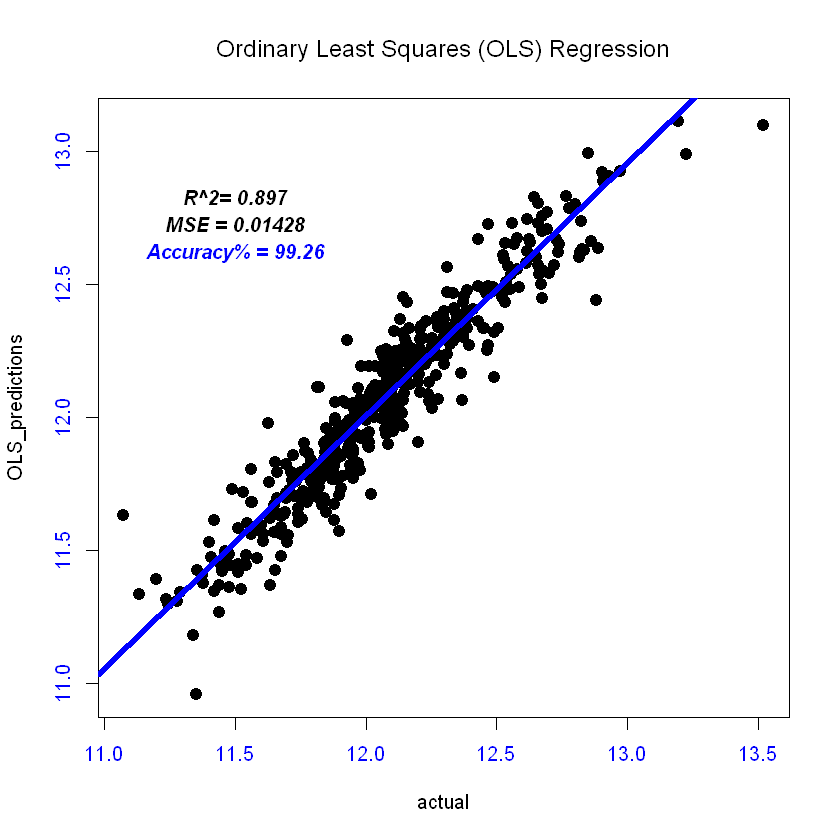

In [11]:
plot(compare, col="black",cex=2, col.axis='blue', pch=20, main = substitute(
    paste("Ordinary Least Squares (OLS) Regression")))
abline(lm(compare$actual ~ compare$OLS_predictions), col="blue", lwd = 5)
text(x=11.5, y=12.9, labels = paste('R^2=', round(R2, 3)), pos = 1, font = 4, col='black')
text(x=11.5, y=12.8, labels = paste("MSE =", round(OLS_mse, 5)), pos = 1, font = 4, col='black')
text(x=11.5, y=12.7, labels = paste("Accuracy% =", OLS_accuracy), pos = 1, font = 4, col='blue')

# 4. 2. Stepwize Linear Regression (SLR)

In [12]:
# fit model
base_fit <- lm(ytraining$SalePrice~., xtraining) #Stepwize Linear Regression (SLR)
# perform step-wise feature selection
SLR_fit <- step(base_fit) #Stepwize Linear Regression (SLR)
# make predictions
SLR_predictions <- predict(SLR_fit, xtest)
# mse
SLR_mse <- mean((ytest$SalePrice - SLR_predictions)^2)
SLR_se <- ((ytest$SalePrice - SLR_predictions)^2)
# calculate accuracy
compare <- cbind (actual=ytest$SalePrice, SLR_predictions)
SLR_accuracy<-mean (apply(compare, 1, min)/apply(compare, 1, max))
compare=as.data.frame(compare)
SLR_ACR<-(apply(compare, 1, min)/apply(compare, 1, max))*100
SLR_accuracy<-round(mean(SLR_ACR), 2)
R2 <- 1 - (sum((ytest$SalePrice-SLR_predictions )^2)/sum((ytest$SalePrice-mean(ytest$SalePrice))^2))

Start:  AIC=-4072.93
ytraining$SalePrice ~ MSSubClass + MSZoning + LotFrontage + LotArea + 
    Street + LotShape + LandContour + LotConfig + Condition1 + 
    Condition2 + BldgType + HouseStyle + OverallQual + OverallCond + 
    YearBuilt + YearRemodAdd + RoofStyle + RoofMatl + Exterior1st + 
    MasVnrType + ExterQual + ExterCond + Foundation + BsmtQual + 
    BsmtCond + BsmtExposure + BsmtFinType1 + BsmtFinSF1 + BsmtFinSF2 + 
    BsmtUnfSF + TotalBsmtSF + HeatingQC + CentralAir + Electrical + 
    GrLivArea + BsmtFullBath + BsmtHalfBath + FullBath + HalfBath + 
    BedroomAbvGr + KitchenAbvGr + KitchenQual + TotRmsAbvGrd + 
    Functional + Fireplaces + FireplaceQu + GarageType + GarageFinish + 
    GarageCars + GarageArea + GarageCond + PavedDrive + WoodDeckSF + 
    OpenPorchSF + Fence + MiscFeature + MiscVal + MoSold + YrSold + 
    SaleType + SaleCondition + FrstFlrSF + BsmtFinSF2_Flag + 
    LandSlope_Gtl + LandSlope_Mod + LandSlope_Sev + Neighborhood_Blmngtn + 
    Neighborhoo

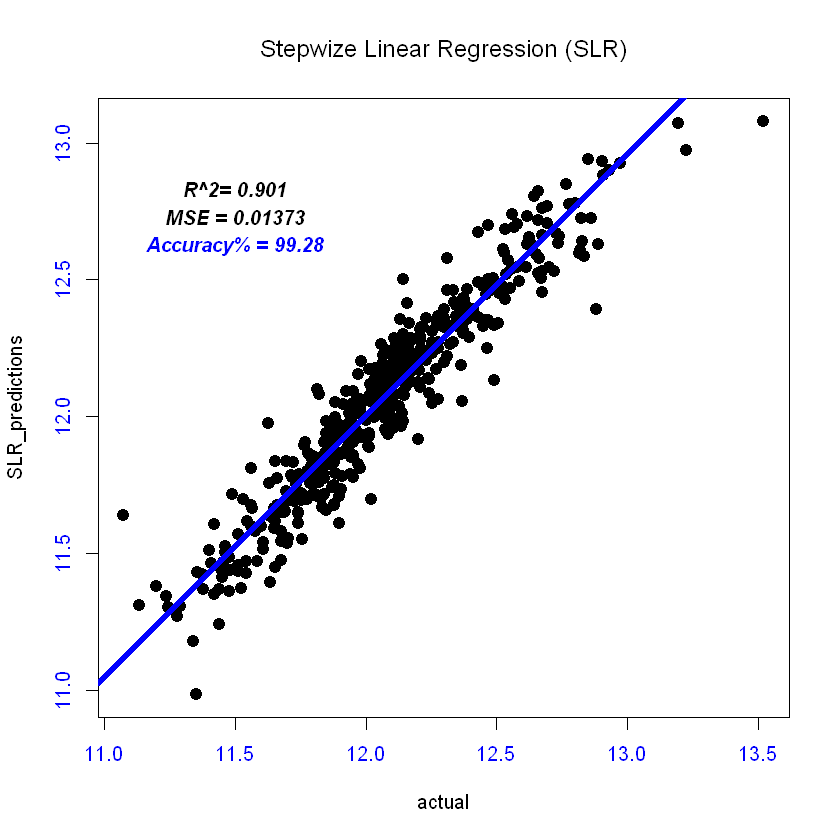

In [13]:
plot(compare, col="black",cex=2, col.axis='blue', pch=20, main = substitute(
    paste("Stepwize Linear Regression (SLR)")))
abline(lm(compare$actual ~ compare$SLR_predictions), col="blue", lwd = 5)
text(x=11.5, y=12.9, labels = paste('R^2=', round(R2, 3)), pos = 1, font = 4, col='black')
text(x=11.5, y=12.8, labels = paste("MSE =", round(SLR_mse, 5)), pos = 1, font = 4, col='black')
text(x=11.5, y=12.7, labels = paste("Accuracy% =", SLR_accuracy), pos = 1, font = 4, col='blue')

# 4.3. Principal Component Regression (PCR)

In [14]:
# load the package
#install.packages("pls")
library(pls)
# fit model
PCR_fit <- pcr(ytraining$SalePrice~., data=xtraining, validation="CV")
# make predictions
PCR_predictions <- predict(PCR_fit, xtest, ncomp=6)
#mse
PCR_mse <- mean((ytest$SalePrice - PCR_predictions)^2)
PCR_se <- ((ytest$SalePrice - PCR_predictions)^2)
# calculate accuracy
compare <- cbind (actual=ytest$SalePrice, PCR_predictions)
compare=as.data.frame(compare)
PCR_accuracy<-mean (apply(compare, 1, min)/apply(compare, 1, max))
PCR_ACR<-(apply(compare, 1, min)/apply(compare, 1, max))*100
PCR_accuracy<-round(mean(PCR_ACR), 2)
R2 <- 1 - (sum((ytest$SalePrice-PCR_predictions )^2)/sum((ytest$SalePrice-mean(ytest$SalePrice))^2))


Attaching package: 'pls'

The following object is masked from 'package:stats':

    loadings



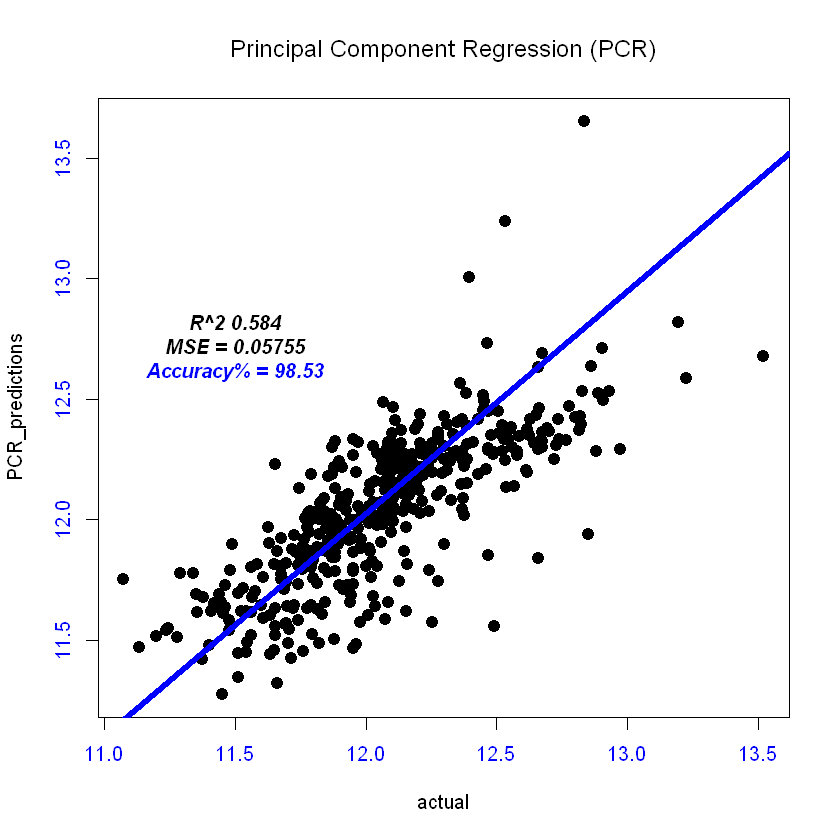

In [15]:
plot(compare, col="black",cex=2, col.axis='blue', pch=20, main = substitute(
    paste("Principal Component Regression (PCR)")))
abline(lm(compare$actual ~ compare$PCR_predictions), col="blue", lwd = 5)
text(x=11.5, y=12.9, labels = paste('R^2', round(R2, 3)), pos = 1, font = 4, col='black')
text(x=11.5, y=12.8, labels = paste("MSE =", round(PCR_mse, 5)), pos = 1, font = 4, col='black')
text(x=11.5, y=12.7, labels = paste("Accuracy% =", PCR_accuracy), pos = 1, font = 4, col='blue')

# Partial Least Squares (PLS) Regression

In [16]:
# load the package
library(pls)
# fit model
PLS_fit <- plsr(ytraining$SalePrice~., data=xtraining, validation="CV")
# make predictions
PLS_predictions <- predict(PLS_fit, xtest, ncomp=7)
# summarize accuracy
PLS_mse<- mean((ytest$SalePrice-PLS_predictions)^2)
PLS_se<- ((ytest$SalePrice-PLS_predictions)^2)
# calculate accuracy
compare <- cbind (actual=ytest$SalePrice, PLS_predictions)
compare=as.data.frame(compare)
PLS_ACR<-(apply(compare, 1, min)/apply(compare, 1, max))*100
PLS_accuracy<-round(mean(PLS_ACR), 2)
R2 <- 1 - (sum((ytest$SalePrice-PLS_predictions )^2)/sum((ytest$SalePrice-mean(ytest$SalePrice))^2))

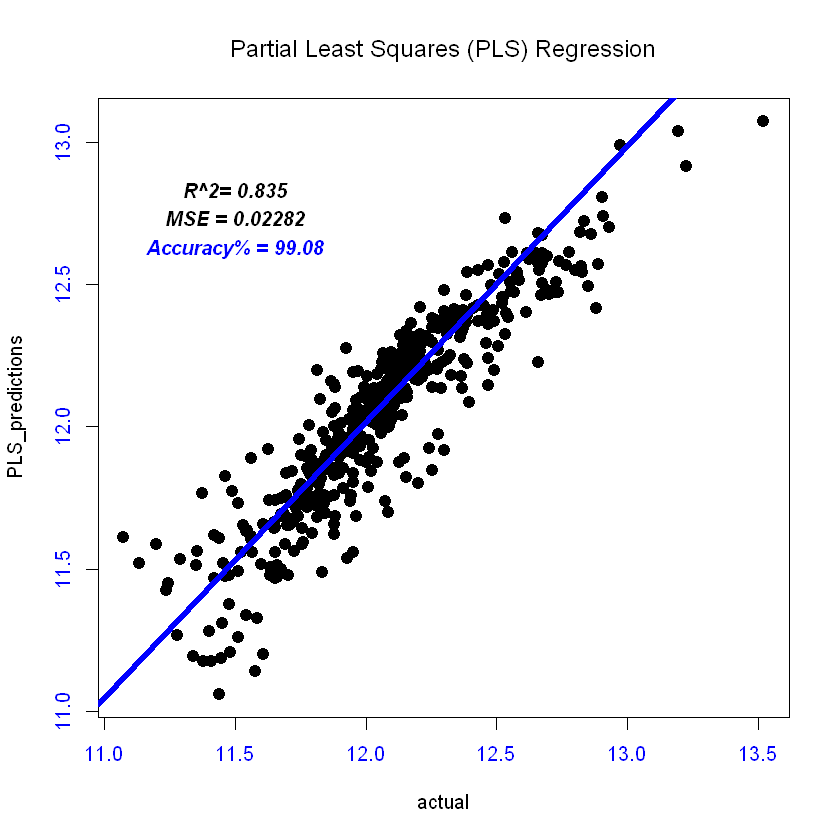

In [17]:
plot(compare, col="black",cex=2, col.axis='blue', pch=20, main = substitute(
    paste("Partial Least Squares (PLS) Regression")))
abline(lm(compare$actual ~ compare$PLS_predictions), col="blue", lwd = 5)
text(x=11.5, y=12.9, labels = paste('R^2=', round(R2, 3)), pos = 1, font = 4, col='black')
text(x=11.5, y=12.8, labels = paste("MSE =", round(PLS_mse, 5)), pos = 1, font = 4, col='black')
text(x=11.5, y=12.7, labels = paste("Accuracy% =", PLS_accuracy), pos = 1, font = 4, col='blue')

# Ridge Regression

In [18]:
#install.packages('ridge') #for Ridge Regression
library(ridge) #for Ridge Regression

In [19]:
RR_fit<-linearRidge(ytraining$SalePrice~., data=xtraining)
# make predictions
RR_predictions <- predict(RR_fit, xtest, ncomp=6)
# summarize accuracy
RR_mse <- mean((ytest$SalePrice-RR_predictions)^2)
RR_se <- ((ytest$SalePrice-RR_predictions)^2)
# calculate accuracy
compare <- cbind (actual=ytest$SalePrice, RR_predictions)
compare=as.data.frame(compare)
RR_ACR<-(apply(compare, 1, min)/apply(compare, 1, max))*100
RR_accuracy<-round(mean(RR_ACR), 2)
R2 <- 1 - (sum((ytest$SalePrice-RR_predictions )^2)/sum((ytest$SalePrice-mean(ytest$SalePrice))^2))

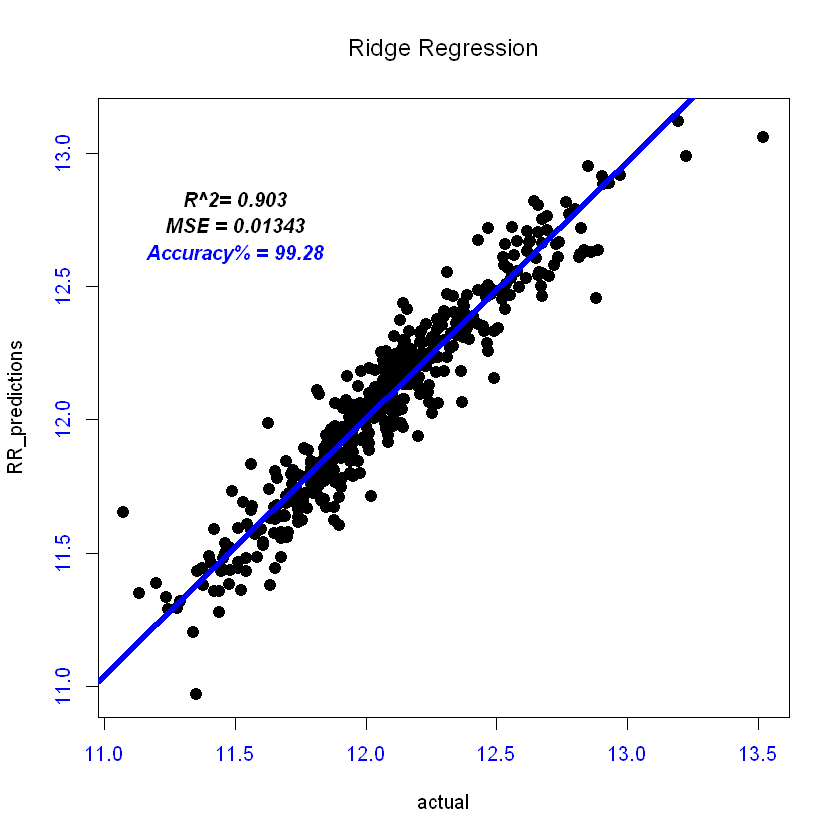

In [20]:
plot(compare, col="black",cex=2, col.axis='blue', pch=20, main = substitute(
    paste("Ridge Regression")))
abline(lm(compare$actual ~ compare$RR_predictions), col="blue", lwd = 5)
text(x=11.5, y=12.9, labels = paste('R^2=', round(R2, 3)), pos = 1, font = 4, col='black')
text(x=11.5, y=12.8, labels = paste("MSE =", round(RR_mse, 5)), pos = 1, font = 4, col='black')
text(x=11.5, y=12.7, labels = paste("Accuracy% =", RR_accuracy), pos = 1, font = 4, col='blue')

# Random Forest Regression

In [21]:
library(randomForest) #Random Forest Regression

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [22]:
RFR_fit <- randomForest(ytraining$SalePrice~., data=xtraining)
# make predictions
RFR_predict<- predict(RFR_fit, xtest)
# summarize accuracy
RFR_mse<- mean((ytest$SalePrice - RFR_predict)^2)
RFR_se<-((ytest$SalePrice - RFR_predict)^2)
# calculate accuracy
compare <- cbind (actual=ytest$SalePrice, RFR_predict)
compare=as.data.frame(compare)
RFR_ACR<-(apply(compare, 1, min)/apply(compare, 1, max))*100
RFR_accuracy<-round(mean(RFR_ACR), 2)
R2 <- 1 - (sum((ytest$SalePrice-RFR_predict )^2)/sum((ytest$SalePrice-mean(ytest$SalePrice))^2))

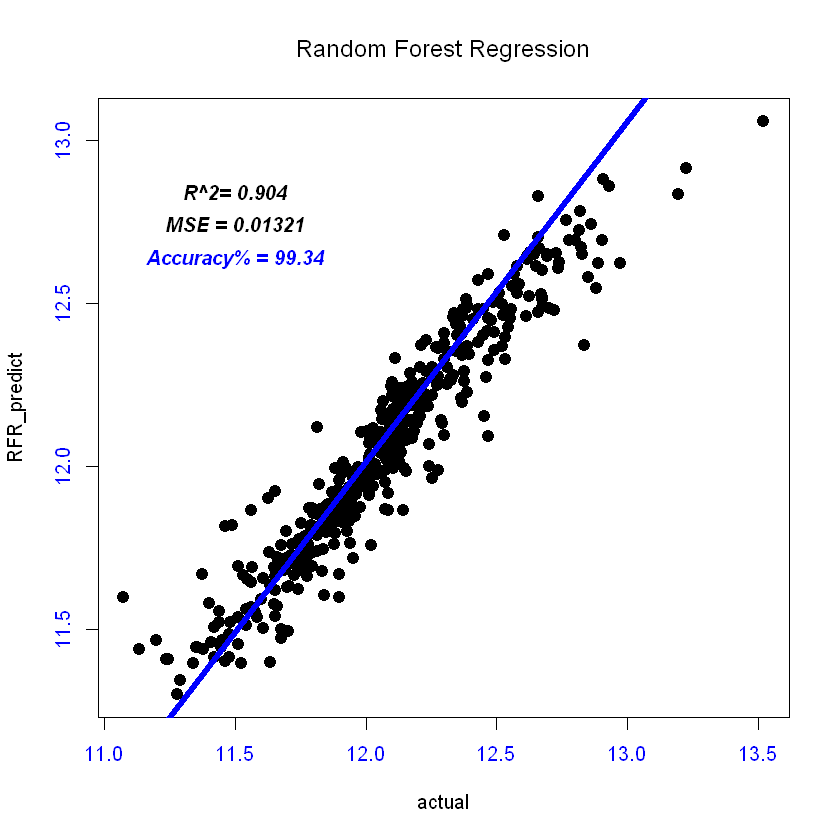

In [23]:
plot(compare, col="black",cex=2, col.axis='blue', pch=20, main = substitute(
    paste("Random Forest Regression")))
abline(lm(compare$actual ~ compare$RFR_predict), col="blue", lwd = 5)
text(x=11.5, y=12.9, labels = paste('R^2=', round(R2, 3)), pos = 1, font = 4, col='black')
text(x=11.5, y=12.8, labels = paste("MSE =", round(RFR_mse, 5)), pos = 1, font = 4, col='black')
text(x=11.5, y=12.7, labels = paste("Accuracy% =", RFR_accuracy), pos = 1, font = 4, col='blue')

In [24]:
importance(RFR_fit)

,IncNodePurity
MSSubClass,0.66209055
MSZoning,1.35019228
LotFrontage,1.80057050
LotArea,3.72671288
Street,0.04571942
LotShape,0.23533105
LandContour,0.19032038
LotConfig,0.13819171
Condition1,0.15626402
Condition2,0.02109091


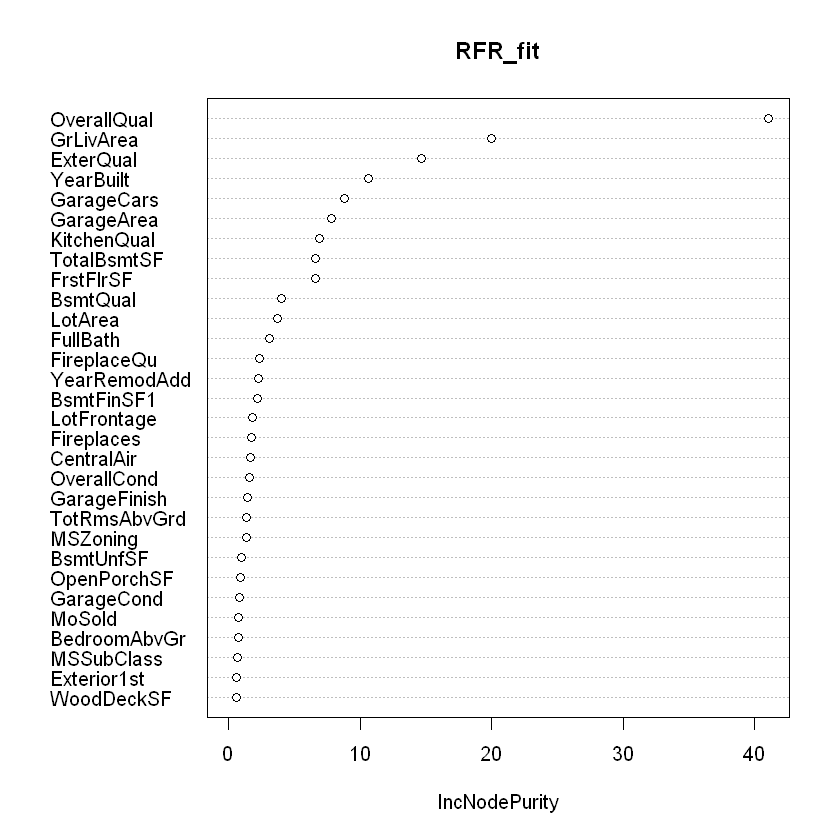

In [25]:
varImpPlot(RFR_fit)

# Support Vector Regression (SVR)

In [26]:
#Load Library
library(e1071)

In [27]:
svm_model <- svm(ytraining$SalePrice~ ., data=xtraining, method="C-classification", kernel="linear")
# make predictions
svm_predictions <- predict(svm_model, xtest)
# summarize accuracy
svm_mse<- mean((ytest$SalePrice - svm_predictions)^2)
svm_se<- ((ytest$SalePrice - svm_predictions)^2)
# calculate accuracy
compare <- cbind (actual=ytest$SalePrice, svm_predictions)
compare=as.data.frame(compare)
svm_ACR<-(apply(compare, 1, min)/apply(compare, 1, max))*100
svm_accuracy<-round(mean(svm_ACR), 2)
R2 <- 1 - (sum((ytest$SalePrice-svm_predictions )^2)/sum((ytest$SalePrice-mean(ytest$SalePrice))^2))

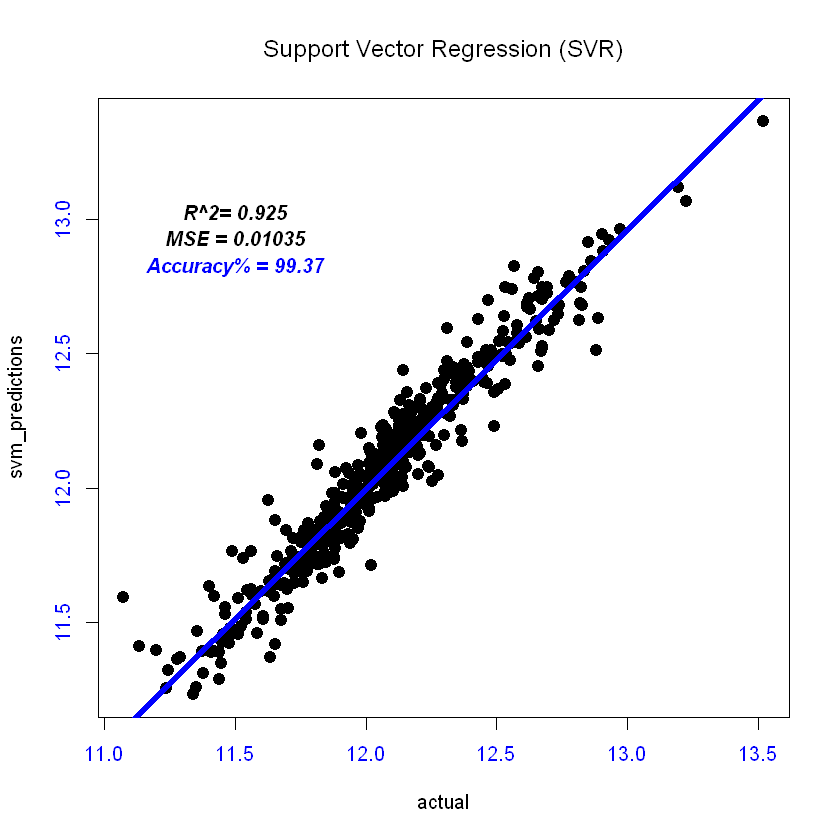

In [28]:
plot(compare, col="black",cex=2, col.axis='blue', pch=20, main = substitute(
    paste("Support Vector Regression (SVR)")))
abline(lm(compare$actual ~ compare$svm_predict), col="blue", lwd = 5)
text(x=11.5, y=13.1, labels = paste('R^2=', round(R2, 3)), pos = 1, font = 4, col='black')
text(x=11.5, y=13, labels = paste("MSE =", round(svm_mse, 5)), pos = 1, font = 4, col='black')
text(x=11.5, y=12.9, labels = paste("Accuracy% =", svm_accuracy), pos = 1, font = 4, col='blue')

# LASSO REGRESSION

In [29]:
library(glmnet)

Warning message:
"package 'glmnet' was built under R version 3.4.4"Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [30]:
# Data = considering that we have a data frame named dataF, with its first column being the class
x <- as.matrix(xtraining) # Removes class
y <- ytraining$SalePrice # Only class
lambda <- 10^seq(10, -2, length = 100)
lasso_fit <- glmnet(x, y, alpha = 0, lambda = lambda)

[1] 0.07735421

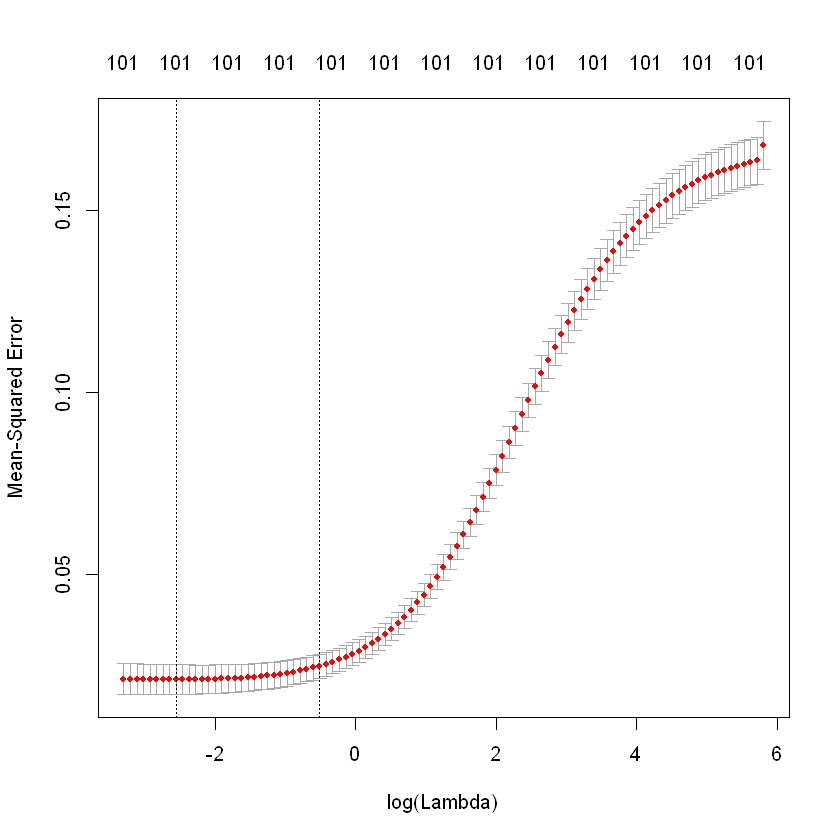

In [31]:
set.seed(1)
cv.out=cv.glmnet(x,y,alpha=0)
plot(cv.out)
bestlam=cv.out$lambda.min
bestlam

In [32]:
testx <- as.matrix(xtest) # Removes class
lasso_predictions <- predict(lasso_fit, s = bestlam, newx = testx)
# summarize accuracy
lasso_mse<- mean((ytest$SalePrice - lasso_predictions)^2)
lasso_se<- ((ytest$SalePrice - lasso_predictions)^2)
# calculate accuracy
compare <- cbind (actual=ytest$SalePrice, lasso_predictions)
compare=as.data.frame(compare)
lasso_ACR<-(apply(compare, 1, min)/apply(compare, 1, max))*100
lasso_accuracy<-round(mean(lasso_ACR), 2)
R2 <- 1 - (sum((ytest$SalePrice-lasso_predictions )^2)/sum((ytest$SalePrice-mean(ytest$SalePrice))^2))

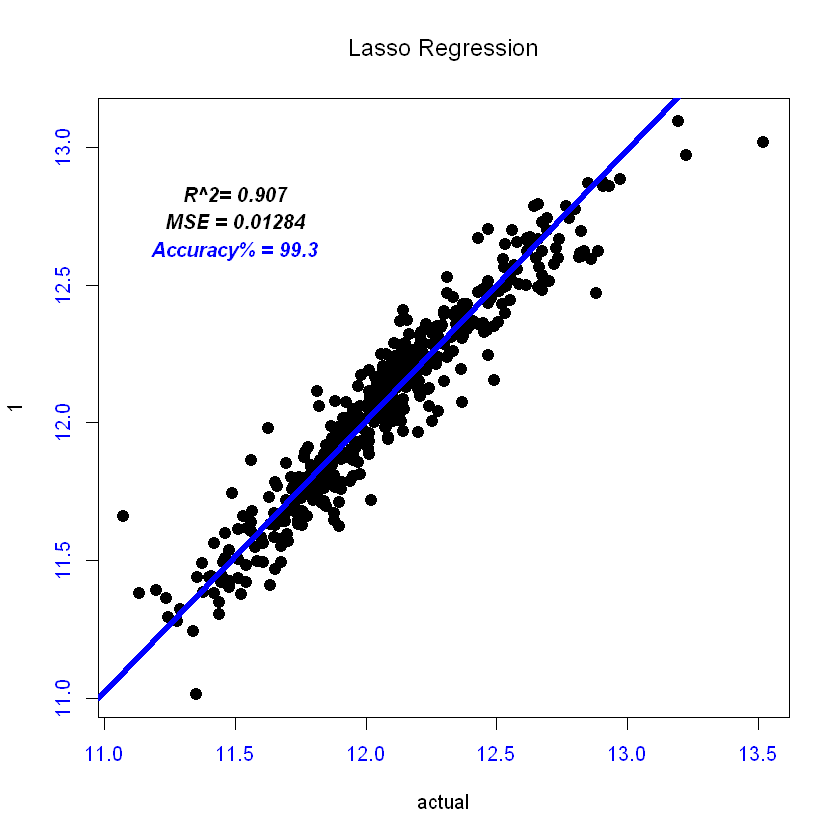

In [33]:
plot(compare, col="black",cex=2, col.axis='blue', pch=20, main = substitute(
    paste("Lasso Regression")))
abline(lm(compare), col="blue", lwd = 5)
text(x=11.5, y=12.9, labels = paste('R^2=', round(R2, 3)), pos = 1, font = 4, col='black')
text(x=11.5, y=12.8, labels = paste("MSE =", round(lasso_mse, 5)), pos = 1, font = 4, col='black')
text(x=11.5, y=12.7, labels = paste("Accuracy% =", lasso_accuracy), pos = 1, font = 4, col='blue')

# Decision Tree Regression


Regression tree:
rpart(formula = ytraining$SalePrice ~ ., data = xtraining, method = "anova")

Variables actually used in tree construction:
[1] CentralAir  FrstFlrSF   GarageArea  GarageCars  GrLivArea   OverallCond
[7] OverallQual TotalBsmtSF YearBuilt  

Root node error: 170.32/1017 = 0.16747

n= 1017 

         CP nsplit rel error  xerror     xstd
1  0.465370      0   1.00000 1.00583 0.053513
2  0.077202      1   0.53463 0.54018 0.032672
3  0.072561      2   0.45743 0.49534 0.028740
4  0.034723      3   0.38487 0.42576 0.025749
5  0.024766      4   0.35014 0.39877 0.022397
6  0.018497      5   0.32538 0.36577 0.021476
7  0.016350      6   0.30688 0.35004 0.020313
8  0.013538      7   0.29053 0.34432 0.020721
9  0.013414      8   0.27699 0.34153 0.020653
10 0.012852      9   0.26358 0.34156 0.020746
11 0.011205     10   0.25073 0.34023 0.021073
12 0.010000     11   0.23952 0.32327 0.020442


ERROR: Error in summary(DT_Rfit): object 'DT_Rfit' not found


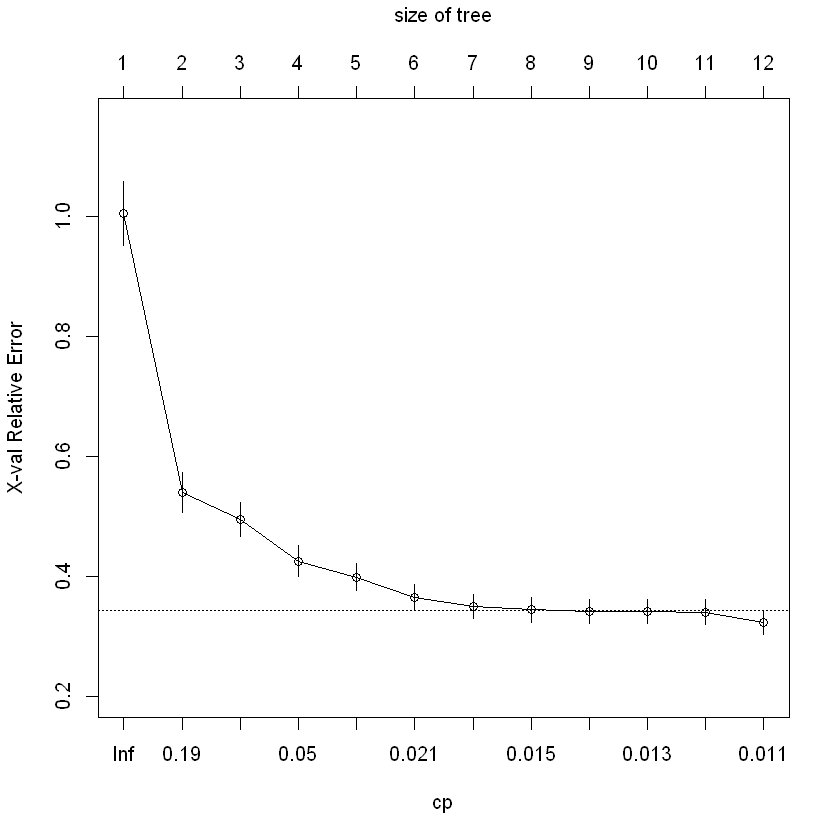

In [34]:
# Classification Tree with rpart
library(rpart)
# fit model
DTR_fit <- rpart(ytraining$SalePrice~., xtraining, method="anova")
printcp(DTR_fit) # display the results 
plotcp(DTR_fit) # visualize cross-validation results 
summary(DT_Rfit) # detailed summary of splits

In [35]:
DTR_predictions <- predict(DTR_fit, xtest)
# summarize accuracy
DTR_mse<- mean((ytest$SalePrice - DTR_predictions)^2)
DTR_se<- ((ytest$SalePrice - DTR_predictions)^2)
# calculate accuracy
compare <- cbind (actual=ytest$SalePrice, DTR_predictions)
compare <- cbind (actual=ytest$SalePrice, DTR_predictions)
compare=as.data.frame(compare)
DTR_ACR<-(apply(compare, 1, min)/apply(compare, 1, max))*100
DTR_accuracy<-round(mean(DTR_ACR), 2)
R2 <- 1 - (sum((ytest$SalePrice-DTR_predictions )^2)/sum((ytest$SalePrice-mean(ytest$SalePrice))^2))

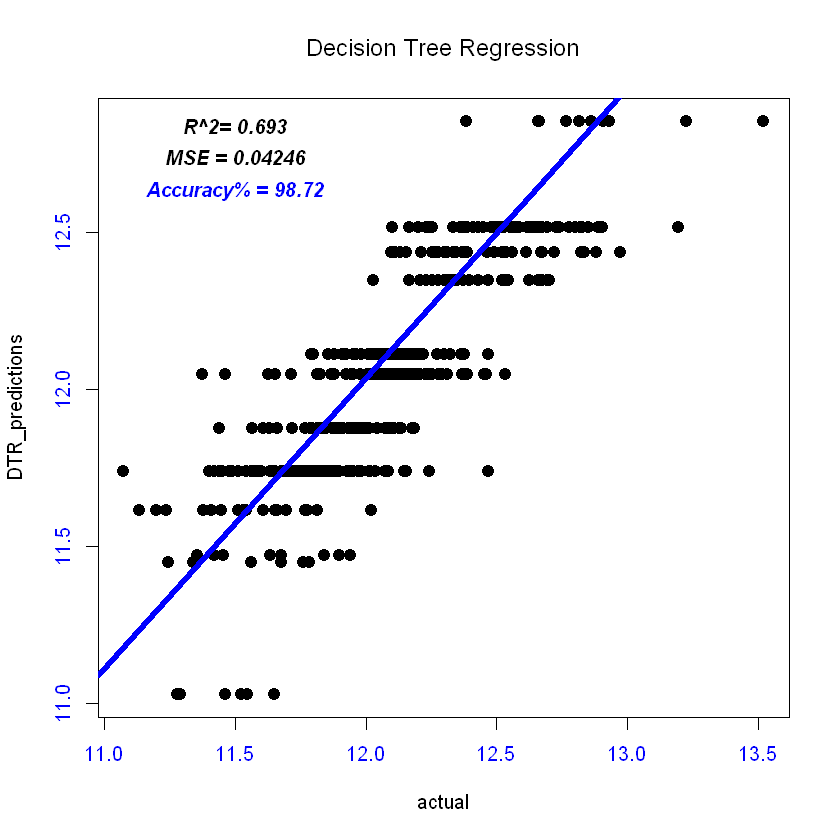

In [36]:
plot(compare, col="black",cex=2, col.axis='blue', pch=20, main = substitute(
    paste("Decision Tree Regression")))
abline(lm(compare), col="blue", lwd = 5)
text(x=11.5, y=12.9, labels = paste('R^2=', round(R2, 3)), pos = 1, font = 4, col='black')
text(x=11.5, y=12.8, labels = paste("MSE =", round(DTR_mse, 5)), pos = 1, font = 4, col='black')
text(x=11.5, y=12.7, labels = paste("Accuracy% =", DTR_accuracy), pos = 1, font = 4, col='blue')

# Quantile Regression

In [37]:
#install.packages("quantreg")
library(quantreg) #for Quantile Regression

Loading required package: SparseM

Attaching package: 'SparseM'

The following object is masked from 'package:base':

    backsolve



In [38]:
QR_fit<- rq(ytraining$SalePrice~.,xtraining,tau = 0.2) 
QR_predictions <- predict(QR_fit, xtest)
# mse
QR_mse<- mean((ytest$SalePrice - QR_predictions)^2)
QR_se<- ((ytest$SalePrice - QR_predictions)^2)
# calculate accuracy
compare <- cbind (actual=ytest$SalePrice, QR_predictions)
compare=as.data.frame(compare)
QR_ACR<-(apply(compare, 1, min)/apply(compare, 1, max))*100
QR_accuracy<-round(mean(QR_ACR), 2)
R2 <- 1 - (sum((ytest$SalePrice-QR_predictions )^2)/sum((ytest$SalePrice-mean(ytest$SalePrice))^2))

ERROR: Error in rq.fit.br(x, y, tau = tau, ...): Singular design matrix


ERROR: Error in paste("MSE =", round(QR_mse, 5)): object 'QR_mse' not found


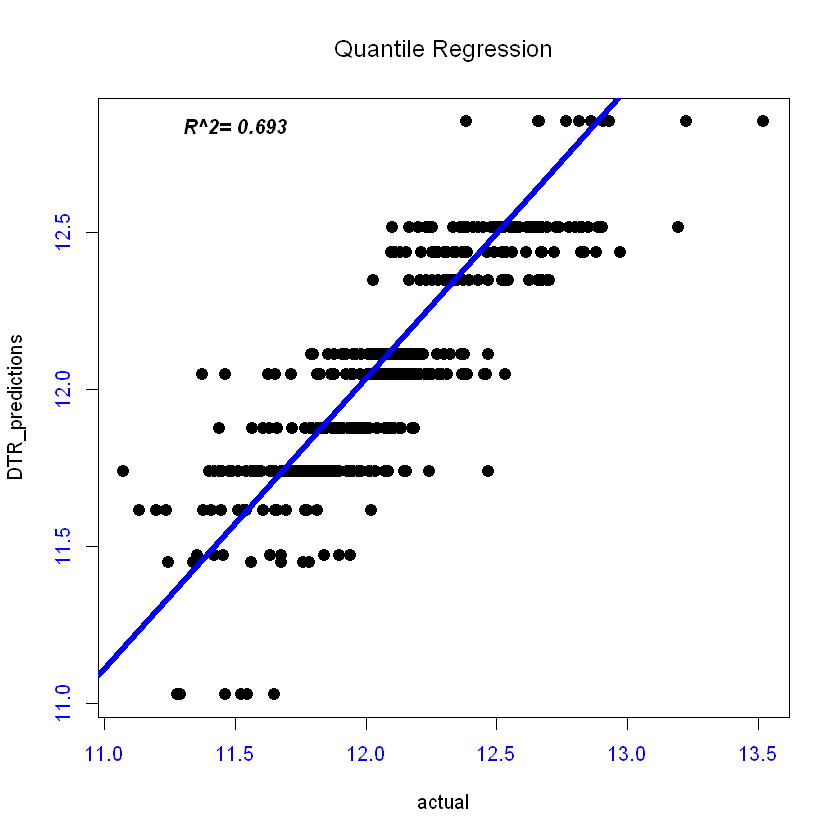

In [39]:
plot(compare, col="black",cex=2, col.axis='blue', pch=20, main = substitute(
    paste("Quantile Regression")))
abline(lm(compare), col="blue", lwd = 5)
text(x=11.5, y=12.9, labels = paste('R^2=', round(R2, 3)), pos = 1, font = 4, col='black')
text(x=11.5, y=12.8, labels = paste("MSE =", round(QR_mse, 5)), pos = 1, font = 4, col='black')
text(x=11.5, y=12.7, labels = paste("Accuracy% =", QR_accuracy), pos = 1, font = 4, col='blue')

# 11. kNN Regression

In [40]:
#install.packages("FNN")
library(FNN)

In [41]:
library(ISLR)
library(class)
library(MASS)


Attaching package: 'class'

The following objects are masked from 'package:FNN':

    knn, knn.cv



In [42]:
knn_fit <- knnreg( xtraining, ytraining$SalePrice,k = 3)
predictions <-predict(knn_fit, xtest)
# mse
kNN_mse<- mean((ytest$SalePrice - predictions)^2)
kNN_se<- ((ytest$SalePrice- predictions)^2)
# calculate accuracy
compare <- cbind (actual=ytest$SalePrice, predictions)
compare=as.data.frame(compare)
kNN_ACR<-(apply(compare, 1, min)/apply(compare, 1, max))*100
kNN_accuracy<-round(mean(kNN_ACR), 2)
R2 <- 1 - (sum((ytest$SalePrice-predictions )^2)/sum((ytest$SalePrice-mean(ytest$SalePrice))^2))

ERROR: Error in knnreg(xtraining, ytraining$SalePrice, k = 3): could not find function "knnreg"


# 5. Comparison Summary

In [43]:
Models <- matrix(c(OLS_mse,SLR_mse, PCR_mse, PLS_mse, RR_mse, RFR_mse, svm_mse, lasso_mse, DTR_mse, OLS_accuracy, SLR_accuracy, PCR_accuracy, PLS_accuracy, RR_accuracy, RFR_accuracy, svm_accuracy, lasso_accuracy, DTR_accuracy), ncol=9,byrow=TRUE)
colnames(Models) <- c("OLS","SLR","PCR","PLS" ,"RR", "RFR", "svm", "Lasso","DTR")
rownames(Models) <- c("mse","accuracy")
Models <- as.table(Models)
comp_mse<-Models[1,1:9]
comp_accuracy<-Models[2,1:9]

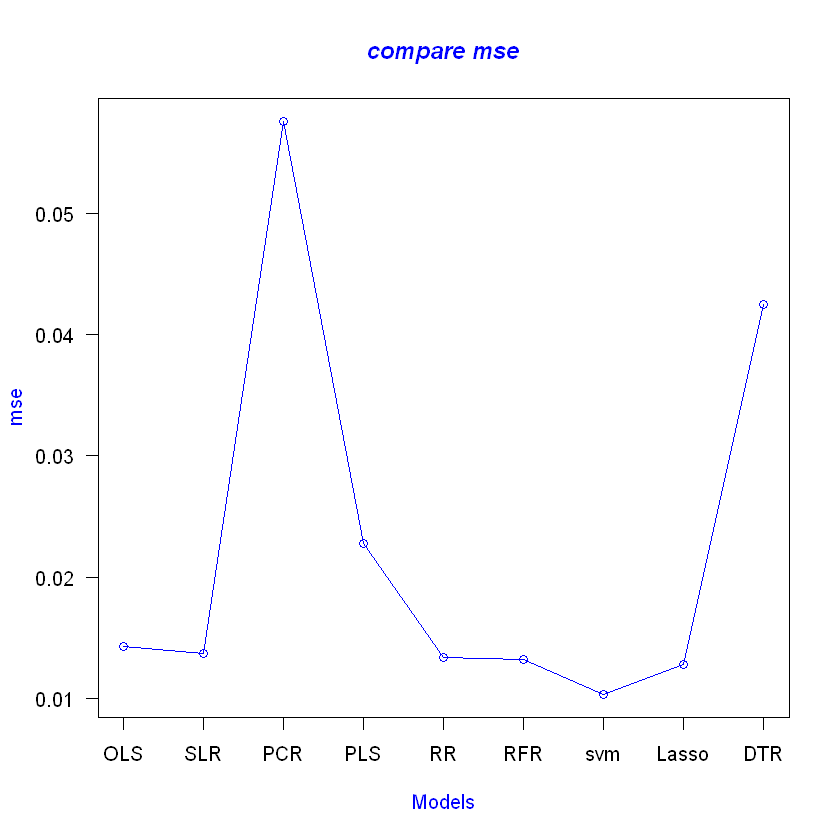

In [44]:
# annotations (axis labels) so we can specify them ourself
plot(comp_mse, las=1, type="o", col="blue",axes=FALSE, ann=FALSE)
# Make x axis using Mon-Fri labels
axis(1, at=1:9, lab=colnames(Models))
# Make y axis with horizontal labels that display ticks at 
# every 4 marks. 4*0:g_range[2] is equivalent to c(0,4,8,12).
axis(2, las=1)
# Create box around plot
box()
# Create a title with a red, bold/italic font
title(main="compare mse", col.main="blue", font.main=4)
# Label the x and y axes with dark green text
title(xlab="Models", col.lab='blue')
title(ylab="mse", col.lab='blue')

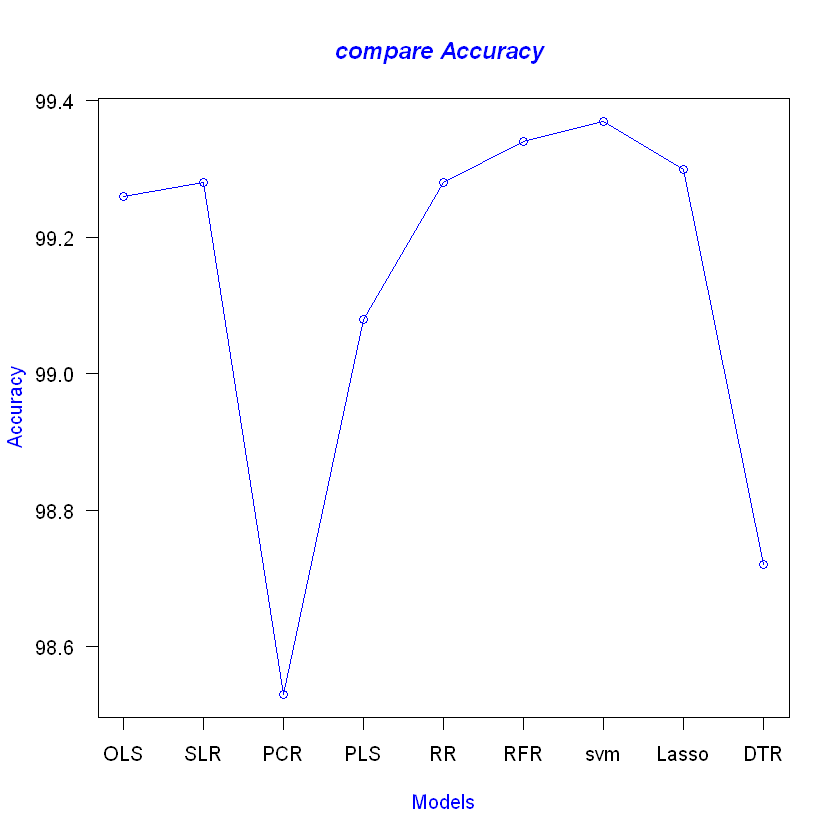

In [45]:
# annotations (axis labels) so we can specify them ourself
plot(comp_accuracy, type="o", col="blue",axes=FALSE, ann=FALSE)
# Make x axis using Mon-Fri labels
axis(1, at=1:9, lab=colnames(Models))
# Make y axis with horizontal labels that display ticks at 
# every 4 marks. 4*0:g_range[2] is equivalent to c(0,4,8,12).
axis(2, las=1)
# Create box around plot
box()
# Create a title with a red, bold/italic font
title(main="compare Accuracy ", col.main="blue", font.main=4)
# Label the x and y axes with dark green text
title(xlab="Models", col.lab='blue')
title(ylab="Accuracy", col.lab='blue')

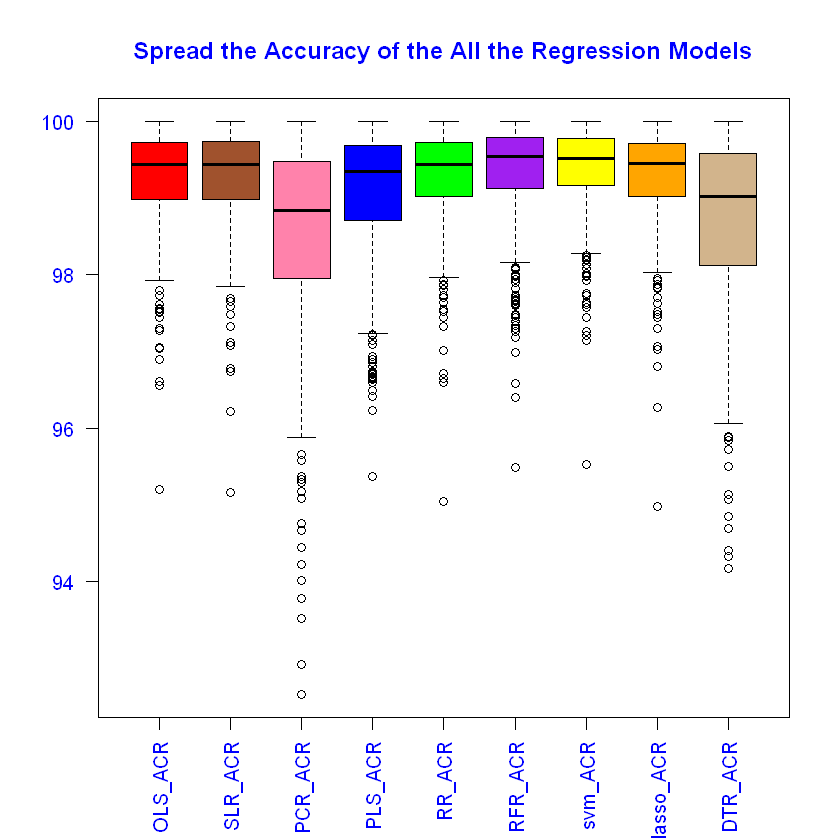

In [46]:
All_ACR <- cbind (OLS_ACR,SLR_ACR, PCR_ACR, PLS_ACR, RR_ACR, RFR_ACR, svm_ACR, lasso_ACR, DTR_ACR)
boxplot(All_ACR, col.axis='blue', las = 2, 
        col = c("red","sienna","palevioletred1","blue","green","Purple","Yellow", 
"Orange","Tan"),col.main="blue",
        main = substitute(paste("Spread the Accuracy of the All the Regression Models")))

In [47]:
All_se <- cbind (OLS_se,SLR_se, PCR_se, PLS_se, RR_se, RFR_se, svm_se, lasso_se, DTR_se)
All_se<-as.data.frame(All_se)
names(All_se)[names(All_se) == 1] = "lasso_se"

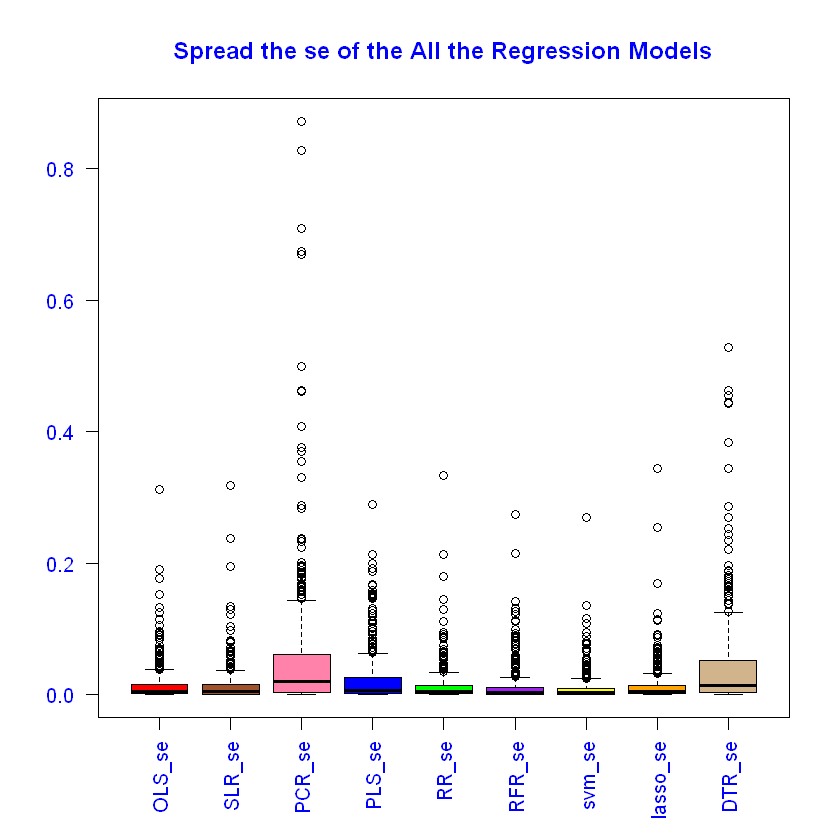

In [48]:
boxplot(All_se, col.axis='blue', las = 2, 
        col = c("red","sienna","palevioletred1","blue","green","Purple","Yellow", 
"Orange","Tan"),col.main="blue",
        main = substitute(paste("Spread the se of the All the Regression Models")))

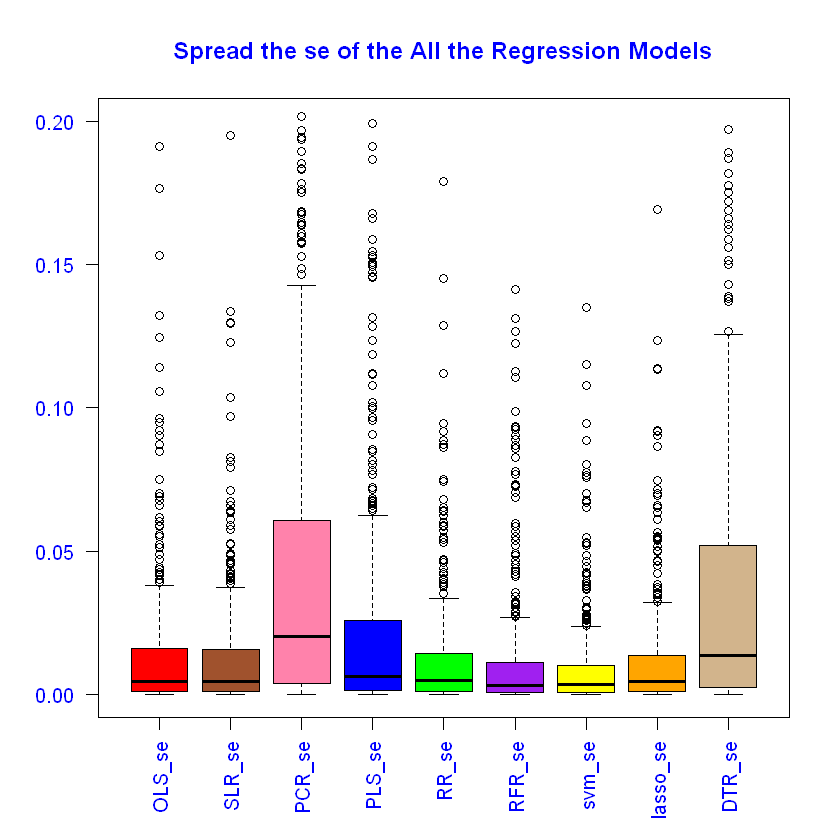

In [49]:
boxplot(All_se, ylim=c(0, 0.2), col.axis='blue', las = 2, 
        col = c("red","sienna","palevioletred1","blue","green","Purple","Yellow", 
"Orange","Tan"),col.main="blue",
        main = substitute(paste("Spread the se of the All the Regression Models")))